In [1]:
import pandas as pd
import os
import sys
#project data
raw_dir = r"C:\Users\dhair\bootcamp_dhairya_gouchwal\project\data\raw\data.csv"
df = pd.read_csv(raw_dir)


In [2]:
# engineered feature (3)

df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')


In [3]:
#1
df['daily_return'] = df['Close'].pct_change()
print (df ['daily_return'])

0            NaN
1            NaN
2            NaN
3      -0.010629
4       0.000854
          ...   
1003    0.004155
1004    0.005222
1005    0.008232
1006    0.001426
1007   -0.003205
Name: daily_return, Length: 1008, dtype: float64


In [4]:
#2
df['rolling_volatility_7d'] = df['daily_return'].rolling(window=7).std()
df['rolling_volatility_7d'].head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     0.010353
10    0.010017
11    0.012086
12    0.012091
13    0.012018
14    0.013797
15    0.013943
16    0.012534
17    0.012582
18    0.013969
19    0.014361
Name: rolling_volatility_7d, dtype: float64

In [6]:
#3
df['ma_20'] = df['Close'].rolling(window=20).mean()
df['ma_20'].head(30)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21    457.229457
22    458.031464
23    459.188855
24    460.552753
25    462.135811
26    464.212650
27    466.074254
28    468.210039
29    470.276408
Name: ma_20, dtype: float64

***Reasoning with insights referencing from HW8 on project data as instructed in the HW starter***
### Feature 1: Daily Return
- Reasoning: Measures day-to-day price changes; essential for volatility and performance analysis.

### Feature 2: Rolling Volatility (7-day)
- Reasoning: Captures short-term risk; higher values indicate unstable prices.

### Feature 3: 20-day Moving Average
- Reasoning: Identifies long-term trends and helps build momentum-based features.

C:\Users\dhair\AppData\Local\Temp\ipykernel_51512\2445334641.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


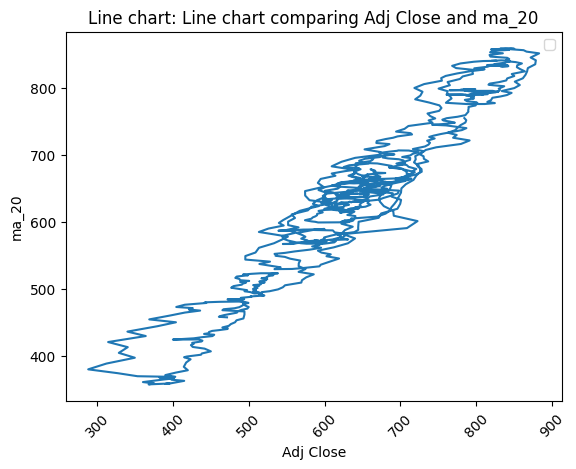

In [7]:
#optional line chart comparing adj_close to ma_20
import matplotlib.pyplot as plt
plt.figure
plt.plot(df['Close'], df['ma_20'])
plt.title("Line chart: Line chart comparing Adj Close and ma_20")
plt.xticks (rotation = 45)
plt.xlabel ("Adj Close")
plt.ylabel ("ma_20")
plt.legend()
plt.show()

In [8]:
processed_dir = r"C:\Users\dhair\bootcamp_dhairya_gouchwal\homework\stage09_feature_engineering\data\processed"
csv_path = os.path.join(processed_dir, 'processed data')
df.to_csv (csv_path, index =False)